In [17]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [18]:
courses = pd.read_csv('data/source_data/courses.csv')
assessments = pd.read_csv('data/source_data/assessments.csv')
vle = pd.read_csv('data/source_data/vle.csv')
studentInfo = pd.read_csv('data/source_data/studentInfo.csv')
studentRegistration = pd.read_csv('data/source_data/studentRegistration.csv')
studentAssessment = pd.read_csv('data/source_data/studentAssessment.csv')
studentVle = pd.read_csv('data/source_data/studentVle.csv')

In [19]:
print("courses:",courses.shape[0],"\n",[colname for colname in courses.columns],"\n")
print("assessments:",assessments.shape[0],"\n",[colname for colname in assessments.columns],"\n")
print("vle:",vle.shape[0],"\n",[colname for colname in vle.columns],"\n")
print("studentInfo:",studentInfo.shape[0],"\n",[colname for colname in studentInfo.columns],"\n")
print("studentRegistration:",studentRegistration.shape[0],"\n",[colname for colname in studentRegistration.columns],"\n")
print("studentAssessment:",studentAssessment.shape[0],"\n",[colname for colname in studentAssessment.columns],"\n")
print("studentVle:",studentVle.shape[0],"\n",[colname for colname in studentVle.columns],"\n")

courses: 22 
 ['code_module', 'code_presentation', 'module_presentation_length'] 

assessments: 206 
 ['code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'weight'] 

vle: 6364 
 ['id_site', 'code_module', 'code_presentation', 'activity_type', 'week_from', 'week_to'] 

studentInfo: 32593 
 ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result'] 

studentRegistration: 32593 
 ['code_module', 'code_presentation', 'id_student', 'date_registration', 'date_unregistration'] 

studentAssessment: 173912 
 ['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'] 

studentVle: 10655280 
 ['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click'] 



In [20]:
# print(studentVle.code_presentation.unique())
# studentVle.loc[studentVle['code_presentation']=='2013J'].loc[studentVle['code_module']=="EEE"].id_site.unique().shape[0]
# print(studentVle.loc[studentVle['']])

# print(vle.columns)
# print(vle.loc[vle['code_presentation']=='2013J'].loc[vle['code_module']=="EEE"].activity_type.value_counts())
# print(vle.loc[vle['code_presentation']=='2014J'].loc[vle['code_module']=="EEE"].activity_type.value_counts())
# print(vle.loc[vle['activity_type']=='resource'].week_from.value_counts())

# assessments.assessment_type.unique()
# assessments.loc[assessments['code_presentation']=='2013J'].loc[assessments['code_module']=="EEE"]

# doll = pd.DataFrame([['a','b','c'], [1,2,3], [5,5,5]], columns = ['g','er','d'])

In [25]:
def get_student_date_site_sumclick_tensor(code_module = None, code_presentation = None, aggregate_sites=True,
                                          id_student = None, date_span = (None, None), data_path='data/source_data'):
    ''' INPUT: code_module - string, code_presentation - string, id_student - list, date_span = (begin, end)
    OUTPUT: numpy tensor with dimensions: 0 - id_student, 1 - date, 2 - id_site, 3 - sum_click
    operates on unprocessed studentVle.csv loaded with pandas.read_csv()
    '''
    tmp = pd.read_csv(data_path+'/studentVle.csv')
    if id_student != None:
        tmp = tmp.loc[tmp['id_student'] in id_student]
    
    tmp = tmp.loc[tmp['code_module']==code_module].loc[tmp['code_presentation']==code_presentation].drop(columns=['code_module', 'code_presentation']).set_index(['id_student','date','id_site'])
    tmp = tmp.groupby(level=tmp.index.names).sum()
    
    if aggregate_sites:
        tmp = tmp.groupby(level=['id_student', 'date']).sum()
    
    all_id_student = tmp.index.get_level_values('id_student').values
    tmp = np.nan_to_num(tmp.squeeze().to_xarray().to_numpy(), copy=False, nan=0.0)
    
    return all_id_student, tmp

In [26]:
# WYBIERANIE TAKIEGO Z EGZAMINEM I NAJWIĘKSZĄ ILOŚCIĄ DANYCH - może nawet zmerguje dane z różnych lat, wywaliwszy tych samych studentów
# assessments.loc[assessments['assessment_type']=='Exam'].loc[assessments['code_presentation']=='Exam']
# assessments.head()

print([studentInfo.loc[studentInfo.code_presentation==cp].loc[studentInfo.code_module=='FFF'].shape[0] for cp in ['2013J', '2013B', '2014J', '2014B']])
assessments.loc[assessments.code_module=='FFF'].set_index(['code_presentation','code_module'])

# póki co F 2014J

[2283, 1614, 2365, 1500]


id_assessment assessment_type   date  weight
code_presentation code_module                                              
2013B             FFF                  34865             CMA  222.0     0.0
                  FFF                  34866             CMA  222.0     0.0
                  FFF                  34867             CMA  222.0     0.0
                  FFF                  34868             CMA  222.0     0.0
                  FFF                  34869             CMA  222.0     0.0
                  FFF                  34871             CMA  222.0     0.0
                  FFF                  34870             CMA  222.0     0.0
                  FFF                  34860             TMA   19.0    12.5
                  FFF                  34861             TMA   47.0    12.5
                  FFF                  34862             TMA   89.0    25.0
                  FFF                  34863             TMA  131.0    25.0
                  FFF                  34864             TMA  166.0    25.0
                  FFF                  34872            Exam  222.0   100.0
2013J             FFF                  34878             CMA  236.0     0.0
                  FFF                  34879             CMA  236.0     0.0
                  FFF                  34880             CMA  236.0     0.0
                  FFF                  34881             CMA  236.0     0.0
                  FFF                  34882             CMA  236.0     0.0
                  FFF                  34884             CMA  236.0     0.0
                  FFF                  34883             CMA  236.0     0.0
                  FFF                  34873             TMA   19.0    12.5
                  FFF                  34874             TMA   47.0    12.5
                  FFF                  34875             TMA   96.0    25.0
                  FFF                  34876             TMA  131.0    25.0
                  FFF                  34877             TMA  173.0    25.0
                  FFF                  34885            Exam  236.0   100.0
2014B             FFF                  34891             CMA  227.0     0.0
                  FFF                  34892             CMA  227.0     0.0
                  FFF                  34893             CMA  227.0     0.0
                  FFF                  34894             CMA  227.0     0.0
                  FFF                  34895             CMA  227.0     0.0
                  FFF                  34897             CMA  227.0     0.0
                  FFF                  34896             CMA  227.0     0.0
                  FFF                  34886             TMA   24.0    12.5
                  FFF                  34887             TMA   52.0    12.5
                  FFF                  34888             TMA   87.0    25.0
                  FFF                  34889             TMA  129.0    25.0
                  FFF                  34890             TMA  171.0    25.0
                  FFF                  34898            Exam  227.0   100.0
2014J             FFF                  34904             CMA  241.0     0.0
                  FFF                  34905             CMA  241.0     0.0
                  FFF                  34906             CMA  241.0     0.0
                  FFF                  34907             CMA  241.0     0.0
                  FFF                  34908             CMA  241.0     0.0
                  FFF                  34910             CMA  241.0     0.0
                  FFF                  34909             CMA  241.0     0.0
                  FFF                  34899             TMA   24.0    12.5
                  FFF                  34900             TMA   52.0    12.5
                  FFF                  34901             TMA   94.0    25.0
                  FFF                  34902             TMA  136.0    25.0
                  FFF                  34903             TMA  199.0    25.0
   

In [27]:
query_params = {"code_module":"FFF",
                "code_presentation":"2014J"}

In [28]:
aids, sdsst_0 = get_student_date_site_sumclick_tensor(query_params['code_module'], query_params['code_presentation'])

In [29]:
module_length = courses.loc[courses['code_module']==query_params['code_module']].loc[courses['code_presentation']==query_params['code_presentation']].drop(columns=['code_module', 'code_presentation']).values[0][0]
module_length

269

In [71]:
assessments_hier = assessments.loc[assessments['code_module']==query_params['code_module']].loc[assessments['code_presentation']==query_params['code_presentation']].drop(columns=['code_module', 'code_presentation']).set_index(['id_assessment'])
assessments_hier.sort_index(inplace=True)

In [75]:
vle_hier = vle.loc[vle['code_module']==query_params['code_module']].loc[vle['code_presentation']==query_params['code_presentation']].drop(columns=['code_module', 'code_presentation']).set_index(['id_site'])
vle_hier.sort_index(inplace=True)
# vle_hier.loc[np.logical_not(vle_hier.week_from.isnull().values)]
# vle_hier.week_from.value_counts()
# vle_hier.activity_type.value_counts()
# vle_hier.loc[vle_hier['activity_type']=='resource'].week_from.unique()

In [76]:
    studentInfo_hier = studentInfo.loc[studentInfo['code_module']==query_params['code_module']].loc[studentInfo['code_presentation']==query_params['code_presentation']].drop(columns=['code_module', 'code_presentation']).set_index(['id_student'])
    studentInfo_hier.sort_index(inplace=True)

In [77]:
studentRegistration_hier = studentRegistration.loc[studentRegistration['code_module']==query_params['code_module']].loc[studentRegistration['code_presentation']==query_params['code_presentation']].drop(columns=['code_module', 'code_presentation']).set_index(['id_student'])
studentRegistration_hier.sort_index(inplace=True)

In [99]:
print(assessments_hier.index.values)
studentAssessment_hier = studentAssessment.loc[studentAssessment[['id_assessment']].applymap(lambda x: x in assessments_hier.index.values)['id_assessment'].values].set_index(['id_student', 'id_assessment']).sort_index().reset_index().set_index(['id_student'])
studentAssessment_hier.head()

[34899 34900 34901 34902 34903 34904 34905 34906 34907 34908 34909 34910
 34911]


,id_assessment,date_submitted,is_banked,score
id_student,,,,
31296,34899,24,0,78.0
31296,34900,58,0,40.0
31296,34901,97,0,38.0
31296,34902,141,0,43.0
31296,34903,199,0,69.0


In [ ]:
# doll = pd.DataFrame([['a','b'],[1,4],[5,6]], columns=['ala', 'mio'])

# doll.loc[:,'ala'].applymap(lambda x: 4)
# doll.loc[doll['ala'] == 'a']
# doll[['mio']].applymap(lambda x: x in [4])

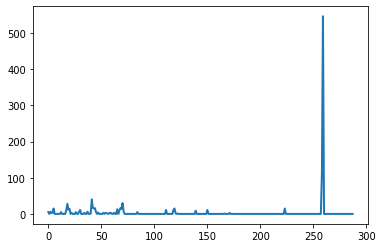

In [80]:
p = plt
p.plot(sdsst_0[332], linewidth=2.0)
plt.show()

In [81]:
student_ref_info = {'id_student':aids[332]}

In [82]:
studentInfo_hier.loc[student_ref_info['id_student']]

gender                                      F
region                    East Anglian Region
highest_education       A Level or Equivalent
imd_band                               80-90%
age_band                                 0-35
num_of_prev_attempts                        0
studied_credits                            90
disability                                  N
final_result                             Pass
Name: 42552, dtype: object

In [83]:
print(assessments_hier)
studentAssessment_hier.loc[student_ref_info['id_student']]
# .loc[(28061,1763)]

              assessment_type   date  weight
id_assessment                               
34899                     TMA   24.0    12.5
34900                     TMA   52.0    12.5
34901                     TMA   94.0    25.0
34902                     TMA  136.0    25.0
34903                     TMA  199.0    25.0
34904                     CMA  241.0     0.0
34905                     CMA  241.0     0.0
34906                     CMA  241.0     0.0
34907                     CMA  241.0     0.0
34908                     CMA  241.0     0.0
34909                     CMA  241.0     0.0
34910                     CMA  241.0     0.0
34911                    Exam  241.0   100.0


,date_submitted,is_banked,score
id_assessment,,,
34899,17,0,84.0
34900,46,0,84.0
34901,89,0,68.0
34902,129,0,74.0
34903,196,0,61.0
34904,49,0,74.0
34905,130,0,72.0
34906,152,0,64.0
34907,152,0,74.0


In [84]:
studentAssessment_hier.head().index
# studentAssessment_hier.loc[(28064)]

MultiIndex([(31296, 34899),
            (31296, 34900),
            (31296, 34901),
            (31296, 34902),
            (31296, 34903)],
           names=['id_student', 'id_assessment'])

In [100]:
studentAssessment_hier

,id_assessment,date_submitted,is_banked,score
id_student,,,,
31296,34899,24,0,78.0
31296,34900,58,0,40.0
31296,34901,97,0,38.0
31296,34902,141,0,43.0
31296,34903,199,0,69.0
...,...,...,...,...
2697921,34906,207,0,59.0
2697921,34907,231,0,73.0
2697921,34908,231,0,92.0


In [86]:
vle_hier.week_from.value_counts()

18.0    28
28.0    20
29.0    17
21.0    16
11.0    14
1.0     13
9.0     12
23.0    12
10.0    11
20.0    11
15.0    11
22.0    10
27.0     9
26.0     8
8.0      8
19.0     7
12.0     7
24.0     7
16.0     7
5.0      6
13.0     6
14.0     6
2.0      5
3.0      5
7.0      2
4.0      1
Name: week_from, dtype: int64

In [101]:
studentAssessment.loc[studentAssessment[['id_assessment']].applymap(lambda x: x in assessments_hier.index.values)['id_assessment'].values].is_banked.value_counts()

0    15916
1      268
Name: is_banked, dtype: int64

In [88]:
studentAssessment_hier.head()

date_submitted  is_banked  score
id_student id_assessment                                  
31296      34899                      24          0   78.0
           34900                      58          0   40.0
           34901                      97          0   38.0
           34902                     141          0   43.0
           34903                     199          0   69.0

In [89]:
assessments_hier

,assessment_type,date,weight
id_assessment,,,
34899,TMA,24.0,12.5
34900,TMA,52.0,12.5
34901,TMA,94.0,25.0
34902,TMA,136.0,25.0
34903,TMA,199.0,25.0
34904,CMA,241.0,0.0
34905,CMA,241.0,0.0
34906,CMA,241.0,0.0
34907,CMA,241.0,0.0


In [122]:
# DATA = {f'{assessments_hier.loc[id_assessment]}_{id_assessment}_score':studentAssessment_hier.loc[studentAssessment_hier['id_assessment']==id_assessment].score.values for id_assessment in assessments_hier.index.values}
# DATA

print(assessments_hier.index.values)

studentAssessment_hier.loc[studentAssessment_hier['id_assessment']==34910].score.values.shape



[34899 34900 34901 34902 34903 34904 34905 34906 34907 34908 34909 34910
 34911]


(1184,)

In [105]:
# studentAssessment_hier.loc[studentAssessment_hier['id_assessment']==34899]


,id_assessment,date_submitted,is_banked,score
id_student,,,,
31296,34899,24,0,78.0
35747,34899,24,0,54.0
35796,34899,22,0,82.0
40857,34899,24,0,86.0
40878,34899,20,0,94.0
...,...,...,...,...
2684048,34899,38,0,68.0
2686035,34899,23,0,90.0
2693932,34899,21,0,90.0


In [114]:
assessment_data = pd.DataFrame(data = DATA,index = studentAssessment_hier.index.unique())
# studentAssessment_hier.index.unique()

ValueError: Length of values (1826) does not match length of index (1843)

In [91]:
studentAssessment_hier.loc[studentAssessment['id_assessment']==34899]
# ['score']

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [69]:
studentAssessment_hier.sort_index()
# ['score']

date_submitted  is_banked  score
id_student id_assessment                                  
31296      34899                      24          0   78.0
           34900                      58          0   40.0
           34901                      97          0   38.0
           34902                     141          0   43.0
           34903                     199          0   69.0
...                                  ...        ...    ...
2697921    34906                     207          0   59.0
           34907                     231          0   73.0
           34908                     231          0   92.0
           34909                     231          0   67.0
           34910                     231          0   71.0

[16184 rows x 3 columns]